# Individual Project Code

In [2]:
#Import all the required libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
np.random.seed(2020) #setting random seed 

In [3]:
df_titanic_train=pd.read_csv('train.csv') #Train Dataset

In [4]:
df_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Understanding and Preparation 
#### Data Exploration 

#### Dataset has below set of Categorical and Continuous Features based on Raw training dataset

Continuous are:
1. Survived (binary)
2. Pclass (Three numerical categories)
3. PassengerID 
6. Age
7. SibSp
8. parch
9. fare

Continuous Features are: 
1. PassengerID
2. Cabin
3. Embarked
4. Name
5. Ticket (Mixed type)

In [5]:
df_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Basic Descriptive Analysis

#### Continuous Features (Data Quality Report and Visualization)

In [6]:
#Code of adding cardinality, Median and missing percentage to data quality report of Continuous features. 
#ALso adding visualizations in the same function

def cont_data_quality_report(df,viz=True):
    df_desc=df.describe()
    cols=df_desc.columns
    med_ls=[]
    miss_ls=[]
    card_ls=[]
    bar_ls=[]
    for c in cols:
        median=np.median(df[c])
        miss_perc=((df[c].isnull().sum())*100)/len(df)
        card=df[c].nunique()
        med_ls.append(median)
        miss_ls.append((miss_perc))
        card_ls.append(card)
        if card < 10:
            bar_ls.append(c)
    Figure_Row_Count=len(df_desc)
    subplot_cnt=1
    colCnt=3 #Column Count is 3
    print("Visualizations for Continuous Feature")
    fig = plt.figure(figsize=(15,30))
    for c in df_desc:
        plt.subplot(Figure_Row_Count, colCnt, subplot_cnt)
        if c in bar_ls:
            sns.countplot(x=c, data=df, color="c")
        else:
            sns.distplot(df[c],color='y')
        subplot_cnt+=1
    plt.show()

    df2=pd.DataFrame([med_ls,miss_ls,card_ls],index=['Median','% Miss','Cardinality'],columns=cols)
    new_desc=df_desc.append(df2)
    print("Data Quality Report of Continuous Feature")
    return new_desc

Visualizations for Continuous Feature


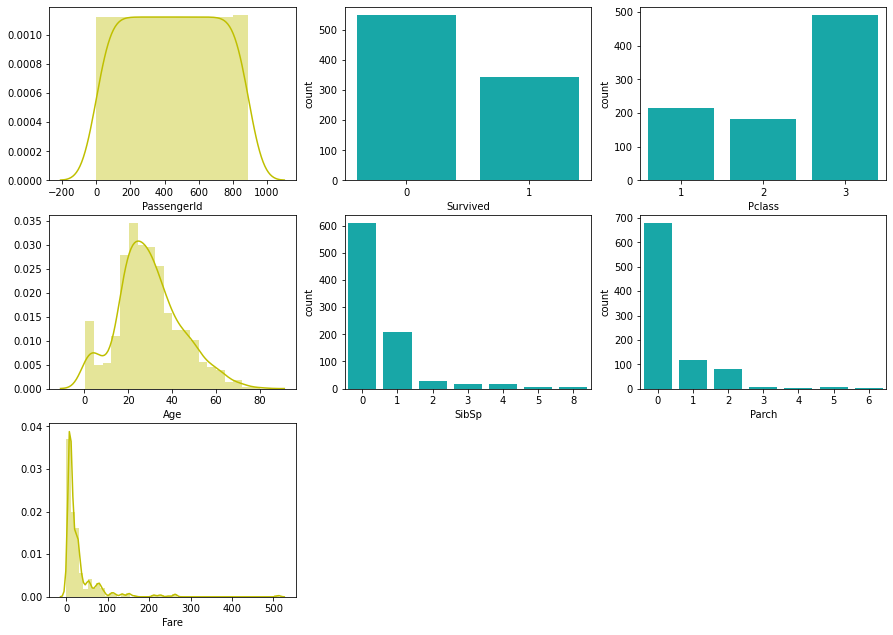

Data Quality Report of Continuous Feature


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
Median,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
% Miss,0.000000,0.000000,0.000000,19.865320,0.000000,0.000000,0.000000


In [7]:
cont_data_quality_report(df_titanic_train)

#### Categorical Features based on Initial Data

1. Sex 
2. Cabin(Mixed and distinct text values , not actually categorical)
3. Embarked
4. Name(Different names not actually categorical)
5. Ticket(Data Type is mixed)


In [8]:
#Code for data quality report for Categorical features
def cat_data_quality_report(df):
    df_desc=df.describe()
    con_columns=df_desc.columns
    df_columns=df.columns
    cat_columns=[x for x in df_columns if x not in con_columns]
    count_ls=[]
    miss_ls=[]
    card_ls=[]
    mode_ls=[]
    mode_freq_ls=[]
    mode_perc_ls=[]
    sec_mode_ls=[]
    sec_mode_freq_ls=[]
    sec_mode_perc_ls=[]
    for c in cat_columns:
        count=len(df)
        miss_perc=((df[c].isnull().sum())*100)/len(df)
        card=df[c].nunique()
        mod=(df[c].value_counts()).head(1).index[0]
        mod_freq=max(df[c].value_counts())
        mod_perc=(mod_freq*100)/(count-(df[c].isnull().sum()))
        sec_mod=(df[c].value_counts()).head(2).index[1]
        sec_mod_freq=(df[c].value_counts())[1]
        sec_mod_perc=(sec_mod_freq*100)/(count-(df[c].isnull().sum()))
        
        
        count_ls.append(count)
        miss_ls.append((miss_perc))
        card_ls.append(card)
        mode_ls.append(mod)
        mode_freq_ls.append(mod_freq)
        mode_perc_ls.append(mod_perc)
        sec_mode_ls.append(sec_mod)
        sec_mode_freq_ls.append(sec_mod_freq)
        sec_mode_perc_ls.append(sec_mod_perc)
        
    Figure_Row_Count=len(df_desc)
    subplot_cnt=1
    colCnt=3 #Column Count is 3
    print("Visualizations for Categorical Feature")
    fig = plt.figure(figsize=(15,30))
    cat_plot_col=[c for c in cat_columns if c not in ['Ticket','Name','Cabin']]
    for c in cat_plot_col:
        plt.subplot(Figure_Row_Count, colCnt, subplot_cnt)
        
        sns.countplot(x=c, data=df, color="c")
        subplot_cnt+=1
    plt.show()
    
    df_cat=pd.DataFrame([count_ls,miss_ls,card_ls,mode_ls,mode_freq_ls,mode_perc_ls,sec_mode_ls,sec_mode_freq_ls,sec_mode_perc_ls],
                        index=['Count','% Miss','Cardinality','Mode','Mode Freq.','Mode %','2nd Mode','2nd Mode Freq.','2nd Mode %'],columns=cat_columns)
    return df_cat

Visualizations for Categorical Feature


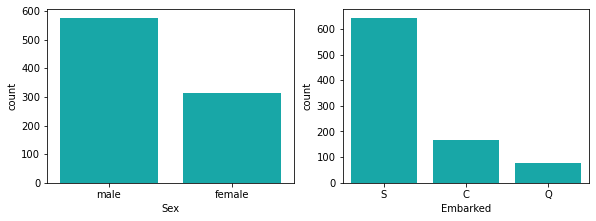

,Name,Sex,Ticket,Cabin,Embarked
Count,891,891,891,891,891
% Miss,0,0,0,77.1044,0.224467
Cardinality,891,2,681,147,3
Mode,"Douglas, Mr. Walter Donald",male,1601,B96 B98,S
Mode Freq.,1,577,7,4,644
Mode %,0.112233,64.7587,0.785634,1.96078,72.4409
2nd Mode,"Crosby, Miss. Harriet R",female,CA. 2343,C23 C25 C27,C
2nd Mode Freq.,1,314,7,4,168
2nd Mode %,0.112233,35.2413,0.785634,1.96078,18.8976


In [9]:
cat_data_quality_report(df_titanic_train)

### Looking at the data below columns have null values:

- Age
- Cabin
- Embarked

In [10]:
nulls_column=df_titanic_train.isnull().any() #Get columns with any null values in the training dataset

# Code to give counts for columns with null compared to total count of dataframe
total_rows=891
for items in nulls_column.iteritems(): 
    if items[1]:
        col=items[0]
        cnt=df_titanic_train[col].isnull().sum()
        missing_Percentage=(cnt/total_rows)*100
        print("Missing Values in", col,":",cnt)
       
        print("% of missing values:",round(missing_Percentage,2),"%")
        print()
        print('-------------')
        print()

Missing Values in Age : 177
% of missing values: 19.87 %

-------------

Missing Values in Cabin : 687
% of missing values: 77.1 %

-------------

Missing Values in Embarked : 2
% of missing values: 0.22 %

-------------



### Data Handling

#### Lets start with Exploration of Age feature

In [11]:
#Age Distribution before imputation:
df_titanic_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

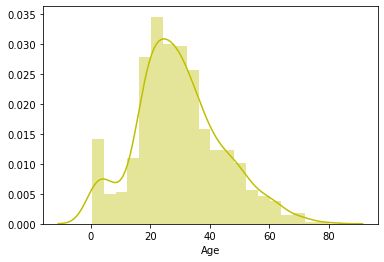

In [12]:
sns.distplot(df_titanic_train['Age'],color='y')

### Imputation with random values generated between mean and 1.5 standard deviation of mean, value of Age Column

In [13]:
mean = df_titanic_train["Age"].mean()
std = df_titanic_train["Age"].std()
is_null = df_titanic_train["Age"].isnull().sum()
# compute random numbers between the mean, std and is_null
random_age = np.random.randint(mean - (1.5*std), mean + (1.5*std), size = is_null)
df_titanic_train.loc[df_titanic_train["Age"].isnull(),'Age']=random_age

In [14]:
df_titanic_train['Age'].isnull().sum()

0

In [15]:
df_titanic_train['Age'].describe()

count    891.000000
mean      29.188743
std       14.169554
min        0.420000
25%       20.000000
50%       28.000000
75%       38.500000
max       80.000000
Name: Age, dtype: float64

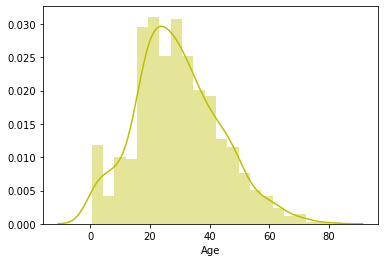

In [16]:
sns.distplot(df_titanic_train['Age'],color='y')

` From Both pre and post imputation, we can see  statistical measures are not impacted much. Hence our imputation does not impact feature distribution.`

### Missing Value Handling for 'Embarked' column

Embarked has only 2 missing values. Hence, it can be changed with mode of the column i.e 'S'

In [17]:
df_titanic_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
df_titanic_train['Embarked'].fillna('S',inplace=True)

df_titanic_train['Embarked'].value_counts()

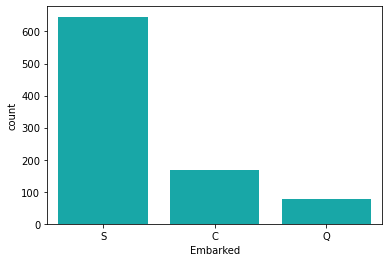

In [19]:
sns.countplot(x='Embarked', data=df_titanic_train, color="c")

### Last column with missing values is "CABIN"

But it has around 77% missing values and by thumb rule we can drop this feature from model. We will keep it for now and will explore later.

### Age and Fare Visualization for Outlier detection

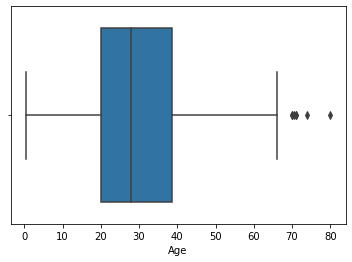

In [20]:
sns.boxplot(x='Age',data=df_titanic_train)

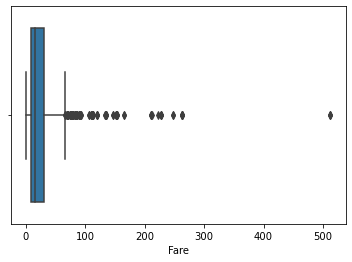

In [21]:
sns.boxplot(x='Fare',data=df_titanic_train)

### We can see there are outliers in both the columns , but these outliers are valid. There is no invalid date or fare value. Hence we will not change it here. These outliers will be handles via normalization and binning.

### Feature Engineering

#### Exploring mixed columns like Name, Ticket and Cabin

### 1. Creating a new feature called Prefix using Name column

In [22]:
import re
#Function get title from name
def get_title(row):
    y= re.findall(',\s(\w*)',row)
    return (''.join(y))

In [23]:
df_titanic_train['Prefix']=df_titanic_train['Name'].apply(get_title)

In [24]:
df_titanic_train['Prefix'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Capt          1
Don           1
Jonkheer      1
Ms            1
Lady          1
the           1
Mme           1
Sir           1
Name: Prefix, dtype: int64

We can group these prefixes into similar values.

Miss, Ms, Mlle ,Mme, Mrs= Madam

Lady, JonKheer, Sir = Royal

Col,Capt,Major=Army

Mr,Don= Mr

Master

Dr

Rev

the -check




In [25]:
def Prefix_Group(row):
    if row.lower() in ['miss','ms','mlle','mme','mrs']:
        return "Madam"
    elif row.lower() in ['lady','jonkheer','sir']:
        return "elite"
    elif row.lower() in ['col','capt','major']:
        return "army"
    elif row.lower() in ['mr','don']:
         return "Mr"
    elif row.lower() == 'the':
        return 'elite'
    else:
        return row
                         

In [26]:
df_titanic_train['Prefix_Group']=df_titanic_train.Prefix.apply(Prefix_Group)

In [27]:
df_titanic_train.Prefix_Group.value_counts()

Mr        518
Madam     311
Master     40
Dr          7
Rev         6
army        5
elite       4
Name: Prefix_Group, dtype: int64

### 2. Exploring Cabin Column and creating new column from it

In [28]:
df_titanic_train[['Cabin','Pclass','Fare','Ticket']]

,Cabin,Pclass,Fare,Ticket
0,NaN,3,7.2500,A/5 21171
1,C85,1,71.2833,PC 17599
2,NaN,3,7.9250,STON/O2. 3101282
3,C123,1,53.1000,113803
4,NaN,3,8.0500,373450
...,...,...,...,...
886,NaN,2,13.0000,211536
887,B42,1,30.0000,112053
888,NaN,3,23.4500,W./C. 6607
889,C148,1,30.0000,111369


In [29]:
#Lets use class to calculate deck associated with cabin. Cabin number is combination of Deck and number. Decks are associated with each class.
df_titanic_train['Deck']=df_titanic_train['Cabin'].str[0]

In [30]:
df_titanic_train['Deck'].describe()

count     204
unique      8
top         C
freq       59
Name: Deck, dtype: object

In [31]:
df_titanic_train['Deck'][df_titanic_train['Pclass']==1].value_counts()

C    59
B    47
D    29
E    25
A    15
T     1
Name: Deck, dtype: int64

In [32]:
df_titanic_train['Deck'][df_titanic_train['Pclass']==2].value_counts()

F    8
E    4
D    4
Name: Deck, dtype: int64

In [33]:
df_titanic_train['Deck'][df_titanic_train['Pclass']==3].value_counts()

F    5
G    4
E    3
Name: Deck, dtype: int64

In [34]:
#Replace nulls with 'U' in deck
df_titanic_train['Deck'].fillna('U',inplace=True)

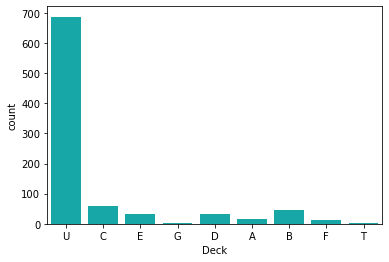

In [35]:
sns.countplot(x='Deck', data=df_titanic_train, color="c")

### 3. Ticket Column

In [36]:
df_titanic_train['Ticket'].value_counts()

1601        7
CA. 2343    7
347082      7
347088      6
3101295     6
           ..
324669      1
65304       1
112052      1
111240      1
349206      1
Name: Ticket, Length: 681, dtype: int64

In [37]:
df_titanic_train[df_titanic_train['Ticket']=='347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,Prefix_Group,Deck
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S,Mr,Mr,U
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S,Miss,Madam,U
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S,Miss,Madam,U
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S,Miss,Madam,U
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S,Mrs,Madam,U
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S,Miss,Madam,U
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S,Master,Master,U


#### Ticket column does not provide much extra information. Hence it will left as it is.

### 4. We can combine columns SibSp and Prach to create a binary column mentioning if passenger is alone or in group. This might have some connection with survival

In [38]:
df_titanic_train["Travelling_with"]=df_titanic_train['SibSp']+df_titanic_train['Parch']
df_titanic_train["Travelling_with"].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Travelling_with, dtype: int64

In [39]:
def family_group(row):
    if row==0:
        return "alone"
    elif row > 0 and row <= 3:
        return "small_group"
    elif row >=4 and row <=6 :
        return "medium_group"
    elif row >6:
        return "large_group"

In [40]:
df_titanic_train["Family_Group"]=df_titanic_train["Travelling_with"].apply(family_group)

In [41]:
df_titanic_train.Family_Group.value_counts()

alone           537
small_group     292
medium_group     49
large_group      13
Name: Family_Group, dtype: int64

### 5. Age Grouping

In [42]:
df_titanic_train['Age'].value_counts()

24.00    32
22.00    32
18.00    30
21.00    29
25.00    28
         ..
24.50     1
34.50     1
74.00     1
0.92      1
0.42      1
Name: Age, Length: 88, dtype: int64

In [43]:
df_titanic_train.Age.describe()

count    891.000000
mean      29.188743
std       14.169554
min        0.420000
25%       20.000000
50%       28.000000
75%       38.500000
max       80.000000
Name: Age, dtype: float64

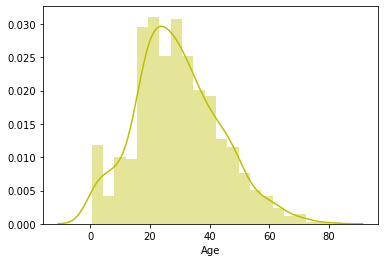

In [44]:
sns.distplot(df_titanic_train['Age'],color='y')

In [45]:
#Based on above distribution of Age, we will divide age into 5 groups: 0-15(minor), 15-35(adults),35-45(middle-aged1) ,
#45-60(middle-aged2) amd 60+(senior)
def Age_Group(row):
    if row >= 0 and row <= 15:
        return "minor"
    elif row > 15 and row <= 35:
        return "adults"
    elif row > 35 and row <=45 :
        return "middle-aged1"
    elif row > 45 and row <=60 :
        return "middle-aged2"
    elif row >60:
        return "senior"

In [46]:
df_titanic_train["Age_Group"]=df_titanic_train["Age"].apply(Age_Group)

In [47]:
df_titanic_train.Age_Group.value_counts()

adults          498
middle-aged1    155
minor           121
middle-aged2     95
senior           22
Name: Age_Group, dtype: int64

## Visualization of Relationships between descriptive features and target feature

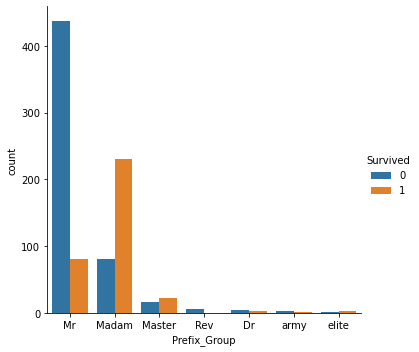

In [48]:
sns.catplot('Prefix_Group',data=df_titanic_train,hue='Survived',kind='count')

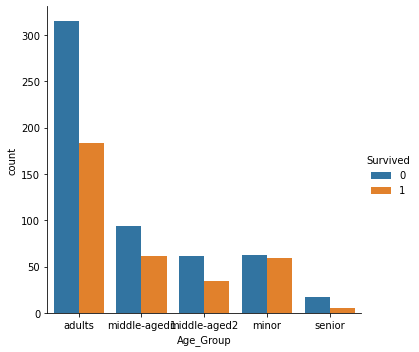

In [49]:
sns.catplot('Age_Group',data=df_titanic_train,hue='Survived',kind='count')

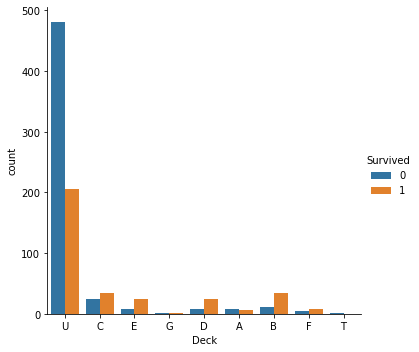

In [50]:
sns.catplot('Deck',data=df_titanic_train,hue='Survived',kind='count')

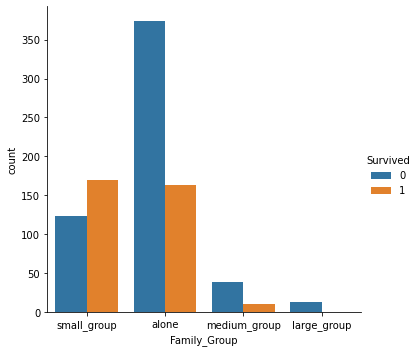

In [51]:
sns.catplot('Family_Group',data=df_titanic_train,hue='Survived',kind='count')

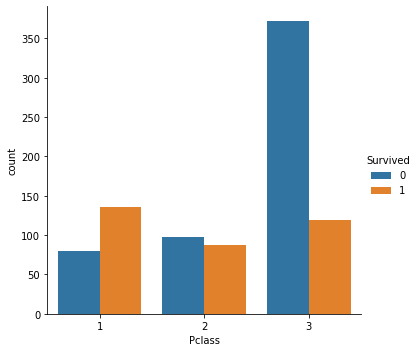

In [52]:
sns.catplot('Pclass',data=df_titanic_train,hue='Survived',kind='count')

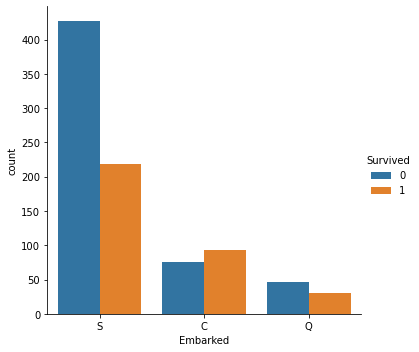

In [53]:
sns.catplot('Embarked',data=df_titanic_train,hue='Survived',kind='count')

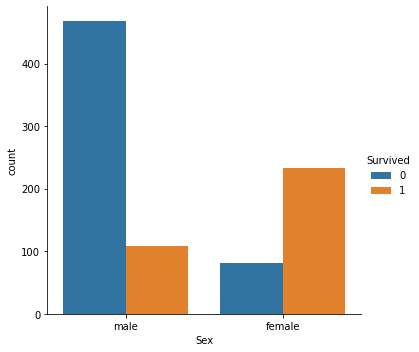

In [54]:
sns.catplot('Sex',data=df_titanic_train,hue='Survived',kind='count')

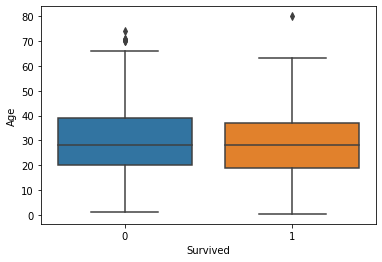

In [55]:
#Plot Age vs Survived
sns.boxplot(y=df_titanic_train['Age'],x=df_titanic_train['Survived'])

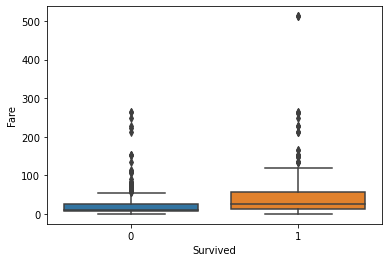

In [56]:
sns.boxplot(y=df_titanic_train['Fare'],x=df_titanic_train['Survived'])
#There is not much relationship between fair and survial 

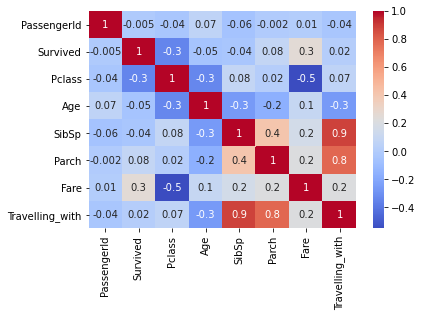

In [57]:
# Initial Heat Map without featured columns
corr = df_titanic_train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot = True, fmt='.1g', cmap= 'coolwarm')

### Converting Categorical Features to Numerical categories

#### Sex

In [58]:
df_titanic_train.loc[df_titanic_train['Sex']=='male', ['Sex']] = 0
df_titanic_train.loc[df_titanic_train['Sex']=='female', ['Sex']] = 1
df_titanic_train['Sex']=df_titanic_train.Sex.astype(str).astype(int)

#### Embarked

In [59]:
df_titanic_train.loc[df_titanic_train['Embarked']=='S', ['Embarked']] = 2
df_titanic_train.loc[df_titanic_train['Embarked']=='C', ['Embarked']] = 1
df_titanic_train.loc[df_titanic_train['Embarked']=='Q', ['Embarked']] = 0
df_titanic_train['Embarked']=df_titanic_train.Embarked.astype(str).astype(int)

#### Family_Group

In [60]:
df_titanic_train.loc[df_titanic_train['Family_Group']=='alone', ['Family_Group']] = 0
df_titanic_train.loc[df_titanic_train['Family_Group']=='small_group', ['Family_Group']] = 1
df_titanic_train.loc[df_titanic_train['Family_Group']=='medium_group', ['Family_Group']] = 2
df_titanic_train.loc[df_titanic_train['Family_Group']=='large_group', ['Family_Group']] = 3

df_titanic_train['Family_Group']=df_titanic_train.Family_Group.astype(str).astype(int)

#### Age_Group

In [61]:
df_titanic_train.loc[df_titanic_train['Age_Group']=='minor', ['Age_Group']] = 0
df_titanic_train.loc[df_titanic_train['Age_Group']=='adults', ['Age_Group']] = 1
df_titanic_train.loc[df_titanic_train['Age_Group']=='middle-aged1', ['Age_Group']] = 2
df_titanic_train.loc[df_titanic_train['Age_Group']=='middle-aged2', ['Age_Group']] = 3
df_titanic_train.loc[df_titanic_train['Age_Group']=='senior', ['Age_Group']] = 4

df_titanic_train['Age_Group']=df_titanic_train.Age_Group.astype(str).astype(int)

#### Deck

In [62]:
df_titanic_train.loc[df_titanic_train['Deck']=='A', ['Deck']] = 0
df_titanic_train.loc[df_titanic_train['Deck']=='B', ['Deck']] = 1
df_titanic_train.loc[df_titanic_train['Deck']=='C', ['Deck']] = 2
df_titanic_train.loc[df_titanic_train['Deck']=='D', ['Deck']] = 3
df_titanic_train.loc[df_titanic_train['Deck']=='E', ['Deck']] = 4
df_titanic_train.loc[df_titanic_train['Deck']=='F', ['Deck']] = 5
df_titanic_train.loc[df_titanic_train['Deck']=='G', ['Deck']] = 6
df_titanic_train.loc[df_titanic_train['Deck']=='T', ['Deck']] = 7
df_titanic_train.loc[df_titanic_train['Deck']=='U', ['Deck']] = 8

df_titanic_train['Deck']=df_titanic_train.Deck.astype(str).astype(int)

#### Prefix Group

In [63]:
df_titanic_train.loc[df_titanic_train['Prefix_Group']=='Mr', ['Prefix_Group']] = 0
df_titanic_train.loc[df_titanic_train['Prefix_Group']=='Madam', ['Prefix_Group']] = 1
df_titanic_train.loc[df_titanic_train['Prefix_Group']=='Master', ['Prefix_Group']] = 2
df_titanic_train.loc[df_titanic_train['Prefix_Group']=='Rev', ['Prefix_Group']] = 3
df_titanic_train.loc[df_titanic_train['Prefix_Group']=='Dr', ['Prefix_Group']] = 4
df_titanic_train.loc[df_titanic_train['Prefix_Group']=='army', ['Prefix_Group']] = 5
df_titanic_train.loc[df_titanic_train['Prefix_Group']=='elite', ['Prefix_Group']] = 6

df_titanic_train['Prefix_Group']=df_titanic_train.Prefix_Group.astype(str).astype(int)

## Data Normalization(Fare column)

In [64]:
#Function to compute min and max normalization
def rang_norm(X,low=-1,high=1):
    min_score=min(X)
    max_score=max(X)
    diff=high-low
    score_r=max_score-min_score
    X_new=[]
    for t in X:
        t_new=((t-min_score)/score_r)*(high-low)+low
        X_new.append(t_new)
    return X_new   

In [65]:
Fare_New=np.array(df_titanic_train['Fare'])
df_titanic_train['Fare']=rang_norm(Fare_New)

## Heat Map

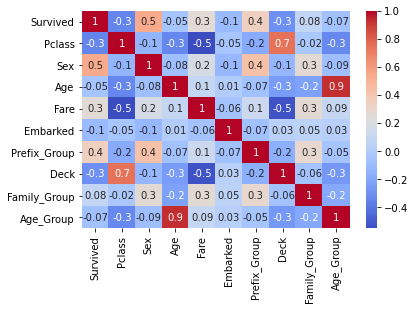

In [66]:
# Compute correlation among the features and the response variable using selected features
df_titanic_subset=df_titanic_train[['Survived','Pclass','Sex','Age','Fare','Embarked','Prefix_Group','Deck','Family_Group','Age_Group']]

corr = df_titanic_subset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot = True, fmt='.1g', cmap= 'coolwarm')

#### We can see Deck and Class are highly correlated.Featured data has added more correlation with target feature and would be beneficial for prediction.

### Feature Selection for Model

#### We will select most related features with survived: Pclass, Sex,Embarked,Deck,Prefix_group,Fare

#### Age , featured Age and Family_Group column  are dropped as it does not show much affect on survival rate.

In [67]:
# Separate Labels and descriptive features
X=df_titanic_train[['Fare','Pclass','Sex','Embarked','Deck','Prefix_Group']]

In [68]:
y=df_titanic_train['Survived'] #Labels

In [69]:
#Convert dataframe to numpy arrays for model
y=np.array(y)
X=np.array(X)

### Splitting train dataset to further train and test to validate and check the performance of our model

First 580 rows for training and remaining 311 for testing the model.

In [70]:
X_train=X[:580]
Y_train=y[:580]

In [71]:
print(X_train.shape)
print(Y_train.shape)

(580, 6)
(580,)


In [72]:
X_test=X[580:]
y_test=y[580:]

In [73]:
print(X_test.shape)
print(y_test.shape)

(311, 6)
(311,)


## Modeling

### KNN Implementation

Below steps are followed from model implementation:

1. Befor calling KNN change test and train dataframe to numpy
1. Store Training data
2. Calculate Euclidean distance
3. Get Nearest neighbors using "k" value
4. Make prediction based on voting from k values


In [74]:
#Function for calculating Euclidean distance between two rows
def euc_distance(train_row,query_row):
    distance=0
    for rn in range(len(train_row)):
        distance+=(train_row[rn]-query_row[rn])**2
    Euc_dist=distance**(0.5)
    return Euc_dist   

In [75]:
#Function to return dictionary with k nearest neighbors for every test row. 
#Dictionary key is test dataset rownumber and its values are list of neighbors
#with euclidean distance and labels for that train dataset row.
def Knn(X_train,y_train,X_test,k=1):
    dict_test={}
    test_row_cnt=0
    neighbors=[]
    for row in X_test:
        distance_ls=[] #distance list for storing distances of each test row and reseting for next test row.
        for idx in range(len(X_train)):
            dist=euc_distance(X_train[idx],row)#call function defined above
            dist_label=dist,y_train[idx],list(X_train[idx])
            distance_ls.append(dist_label)
        test_row_cnt+=1 #row number of test row
        distance_ls.sort() #sort distance list
        k_nearest_neighbors=distance_ls[:k] #slice k nearest neighbors from sorted distance list with train row vectors
        dict_test[test_row_cnt]=k_nearest_neighbors
    return dict_test #returns dictionary with nearest neighbors and there label values for key as test rownumber

In [76]:
#Function for making prediction from nearest neighbors identified by KNN
def prediction(dict_neighbors):
    #Get maximum voted neighbor
    pred_ls=[]
    for val in dict_neighbors.items():
        label_dict={} #dictionary to store labels as key and there count from nearest neighbors.
        for i in val[1]:#loop over list of nearest neighbors for the test row in dictionary
            label=i[1] #label is second value in tuple
            label_dict[label]=label_dict.get(label,0)+1
        #Get label with maximum votes from neighbors
        pred_ls.append(max(label_dict, key=label_dict.get))
    return pred_ls
    

In [77]:
#Function get accuracy score between predicted and actual label values
def accuracy_score(y,y_pred):
    l=len(y)
    match_count=0
    for i in zip(y,y_pred):
        if i[0]==i[1]:
            match_count+=1
    score=(match_count*100)/l
    return score

## Evaluation

In [78]:
#Function to calculate F1 score
def F1_score(y,y_pred):
    l=len(y)
    TP=0
    TN=0
    FP=0
    FN=0
    Con_matrix=pd.DataFrame(columns=['Survive','Died'],index=['Survive','Died'])
    for i in range(l):
        if y[i]==1:
            if y[i]==y_pred[i]:
                TP+=1
            else:
                FN+=1
        elif y[i]==0:
            if y[i]==y_pred[i]:
                TN+=1
            else:
                FP+=1
    Precision=TP/(TP+FP)
    Recall=TP/(TP+FN)
    F1=(2*(Precision*Recall))/(Recall+Precision)
    return F1

In [79]:
#Function for displaying confusion matrix
def Confusion_Matrix(y,y_pred):
    l=len(y)
    TP=0#True Positive
    TN=0#True Negative
    FP=0#False Positive
    FN=0#False Negative
    Con_matrix=pd.DataFrame(columns=['Survive','Died'],index=['Survive','Died'])
    for i in range(l):
        if y[i]==1:
            if y[i]==y_pred[i]:
                TP+=1
            else:
                FN+=1
        elif y[i]==0:
            if y[i]==y_pred[i]:
                TN+=1
            else:
                FP+=1
    
    Con_matrix['Survive']=[TP,FP]   
    Con_matrix['Died']=[FN,TN]
    return Con_matrix

In [80]:
# Code for selecting best "k" value based on highest accuracy and F1 score
for k1 in range(1,30,2):
    knn_model=Knn(X_train,Y_train,X_test,k=k1)
    y_pred=prediction(knn_model)
    sc=accuracy_score(y_test,y_pred)
    f1=F1_score(y_test,y_pred)
    print("Accuracy for k=",k1,"is",sc)
    print("F1 score is ", f1)
    print("---------------------")

Accuracy for k= 1 is 82.63665594855306
F1 score is  0.73
---------------------
Accuracy for k= 3 is 82.63665594855306
F1 score is  0.7326732673267328
---------------------
Accuracy for k= 5 is 85.53054662379421
F1 score is  0.784688995215311
---------------------
Accuracy for k= 7 is 83.27974276527331
F1 score is  0.7425742574257426
---------------------
Accuracy for k= 9 is 81.67202572347267
F1 score is  0.7164179104477613
---------------------
Accuracy for k= 11 is 80.06430868167203
F1 score is  0.6868686868686869
---------------------
Accuracy for k= 13 is 81.35048231511254
F1 score is  0.7128712871287128
---------------------
Accuracy for k= 15 is 81.35048231511254
F1 score is  0.7184466019417476
---------------------
Accuracy for k= 17 is 80.70739549839229
F1 score is  0.7087378640776698
---------------------
Accuracy for k= 19 is 81.02893890675242
F1 score is  0.7064676616915423
---------------------
Accuracy for k= 21 is 81.67202572347267
F1 score is  0.7219512195121951
--------

## Best K value is K=5, it gives 85% accuracy and 78% as F1

Accuracy is: 85.53054662379421
F1 score is: 0.784688995215311



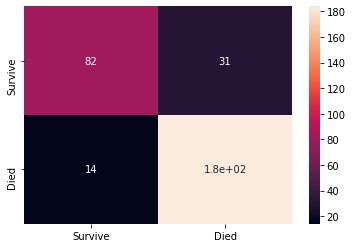

In [81]:
# Best Model with K=5

knn_model=Knn(X_train,Y_train,X_test,k=5)
y_pred=prediction(knn_model)
sc=accuracy_score(y_test,y_pred)
f1=F1_score(y_test,y_pred)
print("Accuracy is:",sc)
print("F1 score is:",f1)
print()
cnft=Confusion_Matrix(y_test,y_pred)
sns.heatmap(cnft,annot=True)

In [82]:
cnft

,Survive,Died
Survive,82,31
Died,14,184


## Deployment

### The above model will be deployed for test dataset. We will use model created for predicting the values for test data using entire train dataset.

In [83]:
df_titanic_test=pd.read_csv('test.csv') ##Test Dataset
df_titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Visualizations for Continuous Feature


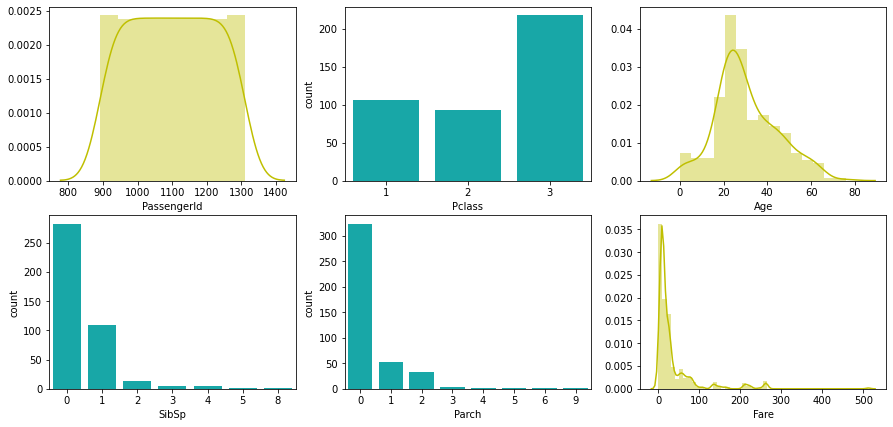

Data Quality Report of Continuous Feature


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200
Median,1100.500000,3.000000,NaN,0.000000,0.000000,NaN
% Miss,0.000000,0.000000,20.574163,0.000000,0.000000,0.239234


In [84]:
cont_data_quality_report(df_titanic_test)

Visualizations for Categorical Feature


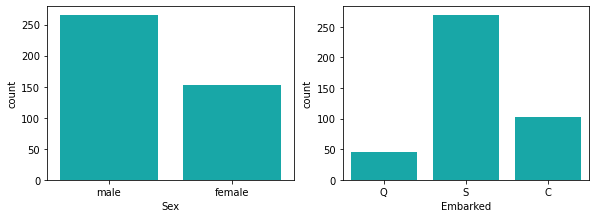

,Name,Sex,Ticket,Cabin,Embarked
Count,418,418,418,418,418
% Miss,0,0,0,78.2297,0
Cardinality,418,2,363,76,3
Mode,"Hagardon, Miss. Kate",male,PC 17608,B57 B59 B63 B66,S
Mode Freq.,1,266,5,3,270
Mode %,0.239234,63.6364,1.19617,3.2967,64.5933
2nd Mode,"Peacock, Mrs. Benjamin (Edith Nile)",female,CA. 2343,C101,C
2nd Mode Freq.,1,152,4,2,102
2nd Mode %,0.239234,36.3636,0.956938,2.1978,24.4019


In [85]:
cat_data_quality_report(df_titanic_test)

### Looking at the data below columns have null values in Test dataset:

- Age
- Cabin
- Fare

In [86]:
nulls_column_test=df_titanic_test.isnull().any() #Get columns with any null values in the Test dataset

# Code to give counts for columns with null compared to total count of dataframe
total_rows=418
print("Missing Values in Testing dataset:\n")
for items in nulls_column_test.iteritems(): 
    if items[1]:
        col=items[0]
        cnt=df_titanic_test[col].isnull().sum()
        missing_Percentage=(cnt/total_rows)*100
        print("Missing Values in", col,":",cnt)
       
        print("% of missing values:",round(missing_Percentage,2),"%")
        print()
        print('-------------')
        print()

Missing Values in Testing dataset:

Missing Values in Age : 86
% of missing values: 20.57 %

-------------

Missing Values in Fare : 1
% of missing values: 0.24 %

-------------

Missing Values in Cabin : 327
% of missing values: 78.23 %

-------------



## Data Preparation of test data

In [87]:
#Age Distribution before imputation:
df_titanic_test['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

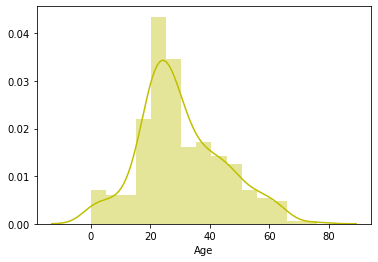

In [88]:
sns.distplot(df_titanic_test['Age'],color='y')

### Imputation with random values generated between mean and 0.5 standard deviation of mean, value of Age Column

In [89]:
mean = df_titanic_test["Age"].mean()
std = df_titanic_test["Age"].std()
is_null = df_titanic_test["Age"].isnull().sum()
# compute random numbers between the mean, std for missing age values
random_age = np.random.randint(mean - (0.5*std), mean + (0.5*std), size = is_null)
df_titanic_test.loc[df_titanic_test["Age"].isnull(),'Age']=random_age

In [90]:
df_titanic_test["Age"].isnull().sum()

0

In [91]:
df_titanic_test['Age'].describe()

count    418.000000
mean      30.245215
std       12.754822
min        0.170000
25%       23.000000
50%       29.000000
75%       36.000000
max       76.000000
Name: Age, dtype: float64

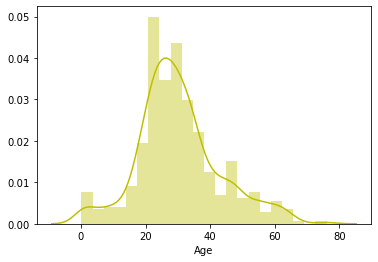

In [92]:
sns.distplot(df_titanic_test['Age'],color='y')

### From Both pre and post imputation in Testing dataset with 0.5 std from mean, we can see  statistical measures are not impacted much. 
Hence our imputation does not impact feature distribution

### Fare Missing Values

In [93]:
df_titanic_test[df_titanic_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [94]:
## We can see this passenger is class 3 and is travelling alone , Hence we will impute it with Fare of single Class 3 passenger
df_titanic_test[df_titanic_test['Pclass']==3].head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S


In [95]:
## We will Impute fare with median Fare of passengers who embarked from same port "S" and were in class 3 and were alone and were male

In [96]:
Fares=df_titanic_test['Fare'][(df_titanic_test["Pclass"]==3) & (df_titanic_test["Embarked"]=='S') & (df_titanic_test['SibSp']==0) 
                & (df_titanic_test['Parch']==0) & (df_titanic_test['Sex']=='male') ]

In [97]:
median_fares = Fares.median()

In [98]:
df_titanic_test['Fare'].fillna(median_fares,inplace=True)

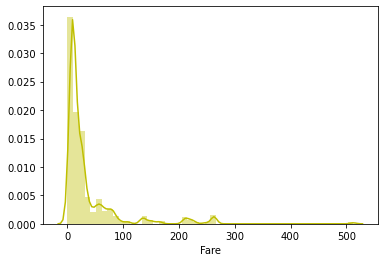

In [99]:
sns.distplot(df_titanic_test['Fare'],color='y')

In [100]:
## Hence no impact on distribution of Fare after imputation

## Feature Engineering

In [101]:
df_titanic_test['Prefix']=df_titanic_test['Name'].apply(get_title)
df_titanic_test['Prefix'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Prefix, dtype: int64

In [102]:
df_titanic_test[df_titanic_test['Prefix']=='Dona']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,Dona


In [103]:
def Prefix_Group(row):
    if row.lower() in ['miss','ms','mlle','mme','mrs','dona']:
        return "Madam"
    elif row.lower() in ['lady','jonkheer','sir']:
        return "elite"
    elif row.lower() in ['col','capt','major']:
        return "army"
    elif row.lower() in ['mr','don']:
         return "Mr"
    elif row.lower() == 'the':
        return 'elite'
    else:
        return row
                         

In [104]:
df_titanic_test['Prefix_Group']=df_titanic_test.Prefix.apply(Prefix_Group)

In [105]:
df_titanic_test.Prefix_Group.value_counts()

Mr        240
Madam     152
Master     21
Rev         2
army        2
Dr          1
Name: Prefix_Group, dtype: int64

In [106]:
#Lets use class to calculate deck associated with cabin. Cabin number is combination of Deck and number. Decks are associated with each class.
df_titanic_test['Deck']=df_titanic_test['Cabin'].str[0]

In [107]:
df_titanic_test['Deck'].value_counts()

C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: Deck, dtype: int64

In [108]:
#Replace nulls with 'U' in deck
df_titanic_test['Deck'].fillna('U',inplace=True)

In [109]:
df_titanic_test["Travelling_with"]=df_titanic_test['SibSp']+df_titanic_test['Parch']
df_titanic_test["Travelling_with"].value_counts()

0     253
1      74
2      57
3      14
4       7
10      4
6       4
5       3
7       2
Name: Travelling_with, dtype: int64

In [110]:
df_titanic_test["Family_Group"]=df_titanic_test["Travelling_with"].apply(family_group)

In [111]:
df_titanic_test.Family_Group.value_counts()

alone           253
small_group     145
medium_group     14
large_group       6
Name: Family_Group, dtype: int64

In [112]:
df_titanic_test["Age_Group"]=df_titanic_test["Age"].apply(Age_Group)

In [113]:
df_titanic_test.Age_Group.value_counts()

adults          276
middle-aged1     58
middle-aged2     41
minor            32
senior           11
Name: Age_Group, dtype: int64

### Converting Test Categorical Features to Numerical categories for Model

#### Sex

In [114]:
df_titanic_test.loc[df_titanic_test['Sex']=='male', ['Sex']] = 0
df_titanic_test.loc[df_titanic_test['Sex']=='female', ['Sex']] = 1
df_titanic_test['Sex']=df_titanic_test.Sex.astype(str).astype(int)

#### Embarked

In [115]:
df_titanic_test.loc[df_titanic_test['Embarked']=='S', ['Embarked']] = 2
df_titanic_test.loc[df_titanic_test['Embarked']=='C', ['Embarked']] = 1
df_titanic_test.loc[df_titanic_test['Embarked']=='Q', ['Embarked']] = 0
df_titanic_test['Embarked']=df_titanic_test.Embarked.astype(str).astype(int)

#### Family_Group

In [116]:
df_titanic_test.loc[df_titanic_test['Family_Group']=='alone', ['Family_Group']] = 0
df_titanic_test.loc[df_titanic_test['Family_Group']=='small_group', ['Family_Group']] = 1
df_titanic_test.loc[df_titanic_test['Family_Group']=='medium_group', ['Family_Group']] = 2
df_titanic_test.loc[df_titanic_test['Family_Group']=='large_group', ['Family_Group']] = 3

df_titanic_test['Family_Group']=df_titanic_test.Family_Group.astype(str).astype(int)

#### Age_Group

In [117]:
df_titanic_test.loc[df_titanic_test['Age_Group']=='minor', ['Age_Group']] = 0
df_titanic_test.loc[df_titanic_test['Age_Group']=='adults', ['Age_Group']] = 1
df_titanic_test.loc[df_titanic_test['Age_Group']=='middle-aged1', ['Age_Group']] = 2
df_titanic_test.loc[df_titanic_test['Age_Group']=='middle-aged2', ['Age_Group']] = 3
df_titanic_test.loc[df_titanic_test['Age_Group']=='senior', ['Age_Group']] = 4

df_titanic_test['Age_Group']=df_titanic_test.Age_Group.astype(str).astype(int)

#### Deck

In [118]:
df_titanic_test.loc[df_titanic_test['Deck']=='A', ['Deck']] = 0
df_titanic_test.loc[df_titanic_test['Deck']=='B', ['Deck']] = 1
df_titanic_test.loc[df_titanic_test['Deck']=='C', ['Deck']] = 2
df_titanic_test.loc[df_titanic_test['Deck']=='D', ['Deck']] = 3
df_titanic_test.loc[df_titanic_test['Deck']=='E', ['Deck']] = 4
df_titanic_test.loc[df_titanic_test['Deck']=='F', ['Deck']] = 5
df_titanic_test.loc[df_titanic_test['Deck']=='G', ['Deck']] = 6
df_titanic_test.loc[df_titanic_test['Deck']=='U', ['Deck']] = 7

df_titanic_test['Deck']=df_titanic_test.Deck.astype(str).astype(int)

#### Prefix Group

In [119]:
df_titanic_test.loc[df_titanic_test['Prefix_Group']=='Mr', ['Prefix_Group']] = 0
df_titanic_test.loc[df_titanic_test['Prefix_Group']=='Madam', ['Prefix_Group']] = 1
df_titanic_test.loc[df_titanic_test['Prefix_Group']=='Master', ['Prefix_Group']] = 2
df_titanic_test.loc[df_titanic_test['Prefix_Group']=='Rev', ['Prefix_Group']] = 3
df_titanic_test.loc[df_titanic_test['Prefix_Group']=='Dr', ['Prefix_Group']] = 4
df_titanic_test.loc[df_titanic_test['Prefix_Group']=='army', ['Prefix_Group']] = 5
df_titanic_test.loc[df_titanic_test['Prefix_Group']=='elite', ['Prefix_Group']] = 6

df_titanic_test['Prefix_Group']=df_titanic_test.Prefix_Group.astype(str).astype(int)

In [120]:
Fare_New_test=np.array(df_titanic_test['Fare'])
df_titanic_test['Fare']=rang_norm(Fare_New_test)

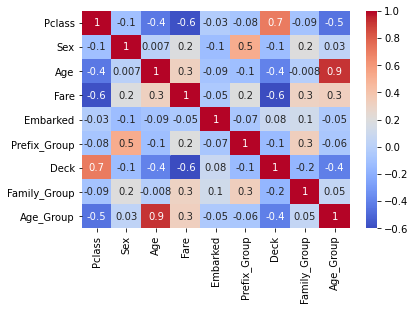

In [121]:
# Compute correlation among the features and the response variable using selected features
df_titanic_test_subset=df_titanic_test[['Pclass','Sex','Age','Fare','Embarked','Prefix_Group','Deck','Family_Group','Age_Group']]

corr = df_titanic_test_subset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot = True, fmt='.1g', cmap= 'coolwarm')

## Predictions of test data

In [122]:
X_train=df_titanic_train[['Fare','Pclass','Sex','Embarked','Deck','Prefix_Group']] #Train dataset
Y_train=df_titanic_train['Survived'] #labels from train dataset

#test dataset
X_test=df_titanic_test[['Fare','Pclass','Sex','Embarked','Deck','Prefix_Group']]

In [123]:
#Convert dataframe to numpy arrays for model
Y_train=np.array(Y_train)
X_train=np.array(X_train)

X_test=np.array(X_test)


In [124]:
knn_model_test=Knn(X_train,Y_train,X_test,k=5) #k=5 was our best model in model validation
y_test_pred=prediction(knn_model_test)

In [125]:
Final_result=pd.DataFrame(df_titanic_test["PassengerId"])

In [126]:
Final_result['Survived']=y_test_pred

In [127]:
Final_result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [128]:
Final_result.to_csv("Submission.csv",index=False)